## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [83]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [84]:
#reading the CSV file and save it to the data frame
df = pd.read_csv('ab_data.csv')

In [85]:
df.head(1)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0


b. Use the below cell to find the number of rows in the dataset.

The number of rows are (294478)

In [86]:
#use shape to view the rows
df.shape[0]

294478

In [87]:
#use shape to view the columns
df.shape[1]

5

c. The number of unique users in the dataset.

Total unique users are 290584

In [88]:
#use nunique function to view the number of unique users in the user_id column
df["user_id"].nunique()

290584

d. The proportion of users converted.

The proportion of users converted 0.1%

In [89]:
#count the number of converted and divided by the total users
Proportion = df["converted"].sum()/ df["user_id"].nunique()
Proportion*100

12.126269856564711

e. The number of times the `new_page` and `treatment` don't line up.

Total Number is 3893

In [90]:
df["group"].unique()

array(['control', 'treatment'], dtype=object)

In [91]:
df["landing_page"].unique()

array(['old_page', 'new_page'], dtype=object)

In [92]:
#use query and shape to count the number of times treatment with old page and control with new page
Control_New_Page = df.query("group == 'control' and landing_page == 'new_page'").shape[0]
Treatment_Old_Page = df.query("group == 'treatment' and landing_page == 'old_page'").shape[0]
#Total number of times
Total = Control_New_Page + Treatment_Old_Page
Total

3893

f. Do any of the rows have missing values?

No

In [93]:
#use isnull and sum to count the null values per column
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [94]:
#remove them 
df2 = df.query("group =='treatment' and landing_page == 'new_page'")
df2 = df2.append(df.query("group == 'control' and landing_page == 'old_page'"))

In [95]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

Total unique users are 290584

In [96]:
#use nunique function to view the number of unique users in the user_id column
df2["user_id"].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

The user_id for the non-unique id in df2 is 773192

In [97]:
#use duplicate function to check the non uniqueid
df2[df2["user_id"].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

Group is treatment,
Landing page is new,
Value of converted is 0

In [98]:
#view the duplicate row for user 773192
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [99]:
#remove the second row and save the changes in df2
df2 = df2.drop(2893)

In [100]:
#check the rows
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

Probability of converting regardless of page is 0.119

In [101]:
#the mean of the converted
df2["converted"].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

is 0.1203

In [102]:
#check the mean when the group is control
P_Control = df.query("group =='control'")['converted'].mean()
P_Control

0.12039917935897611

c. Given that an individual was in the `treatment` group, what is the probability they converted?

is 0.1189

In [103]:
#check the mean when the group is treatment
P_Treatment = df.query("group =='treatment'")['converted'].mean()
P_Treatment

0.11891957956489856

d. What is the probability that an individual received the new page?

is 0.5000

In [104]:
#total rows
Total_rows = df2.shape[0]
#total rows of the new page
New_page_rows = df2.query("landing_page =='new_page'").shape[0]
#divided by the total rows
New_page_rows/Total_rows

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

I don't see sufficient evidence to approve that the new page leads to more conversions insted I see lower conversion rate than the old page

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**


Null Hypotheses = The new page is equal or worse than the old page (means the old page has higher conversion rate)

Alternative Hyptheses = The new page is better than the old page (means the new page has higher conversion rate)

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

convert rate is 0.11959

In [105]:
#the mean of the converted column
Convert_rate = df2["converted"].mean()
Convert_rate 

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

convert rate is 0.11959

In [106]:
#the mean of the converted column (both same rate regardless of the page under the null hypothesis)
Convert_rate = df2["converted"].mean()
Convert_rate 

0.11959708724499628

c. What is $n_{new}$?

n_new is 145310

In [107]:
#Number of the new pages
n_new = df2.query("landing_page == 'new_page'").shape[0]
n_new

145310

d. What is $n_{old}$?

n_old is 145274

In [108]:
#Number of the old pages
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [109]:
#new page (simulation) using binomial (1 and 0)
new_page_converted = np.random.binomial(1, Convert_rate, n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [110]:
#old page (simulation) using binomial (1 and 0)
old_page_converted = np.random.binomial(1,Convert_rate, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [111]:
#the probability diff between the new_page_converted and old_page_converted (under null)
new_page_converted.mean() - old_page_converted.mean()

-0.0007728745462762115

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [112]:
#create array to store the simulation on 10000 values
p_diffs = []
Simulate_P_new = np.random.binomial(n_new, Convert_rate,10000)/n_new
Simulate_P_old = np.random.binomial(n_old, Convert_rate,10000)/n_old
p_diffs = Simulate_P_new - Simulate_P_old

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0, 0.5, 'frequency')

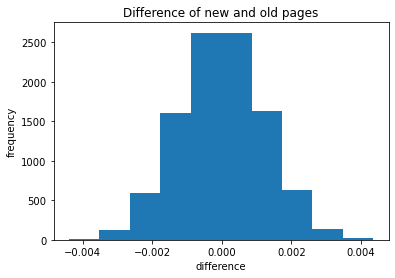

In [113]:
#plotting p_diffs
plt.hist(p_diffs)
plt.title('Difference of new and old pages')
plt.xlabel('difference')
plt.ylabel('frequency')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [114]:
#calculate the actual observed
convert_new_page = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
convert_old_page = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()
actual_CNP = float(convert_new_page)/ float(n_new) 
actual_COP = float(convert_new_page)/ float(n_old)
actual_Observed = actual_CNP - actual_COP

In [115]:
#proportion of p_diffs greater than the actual
p_greater_than = [i for i in p_diffs if i > actual_Observed]

In [116]:
#calculate p_val
p_val = len(p_greater_than)/len(p_diffs)
p_val

0.5047

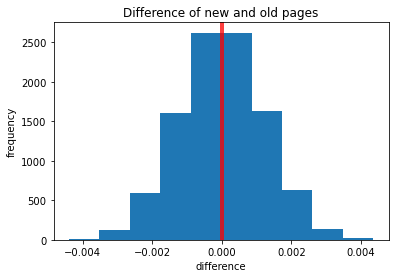

In [117]:
#plotting p_diffs
plt.hist(p_diffs)
plt.title('Difference of new and old pages')
plt.xlabel('difference')
plt.ylabel('frequency')
#plot the difference lines using axvline
plt.axvline(actual_Observed, color = "red")
plt.axvline(p_diffs.mean() + (p_diffs.mean() - actual_Observed), color = "red")

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

We are calculating the P-Value, the probability that the distribution will be (equal/greater than) or (equal/less than) to the observed difference. Since the P-Value is high here, we approved that the null hypothesis is true and the old page is better than the new page

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [118]:
#the number of conversions fo each page
convert_old = df2.query("landing_page == 'old_page'")['converted'].sum() 
convert_new = df2.query("landing_page == 'new_page'")['converted'].sum()

print("convert_old:", convert_old)
print("convert_new:", convert_new)
print("n_old:", n_old)
print("n_new:", n_new)

convert_old: 17489
convert_new: 17264
n_old: 145274
n_new: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [119]:
#import statsmodels to use stats.proportions_ztest
import statsmodels.api as sm

z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

The Z-Score is the difference between the two lines in the above histogram and it is the way to quantify the difference between conversion rates. The result is less than the P-Value to reject the null hypothesis. Z-Score and P-Value both are agree with the findings in parts j and k

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

Logistic regression because we are predicting binary outcomes (conversion or no conversion)

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [120]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [121]:
#create dummy variables and ab_page column
df2[['treatment','control']]= pd.get_dummies(df2['group'])
df2['ab_page'] = df2['treatment']

In [122]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted,treatment,control,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [123]:
#create the model
df2['intercept'] = 1
logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [124]:
#view the summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 12 Nov 2022   Pseudo R-squ.:               8.077e-06
Time:                        17:30:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
ab_page        0.0150      0.011      1.311      0.190      -0.007       0.037
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

The P-Value of the ab_page is 0.190 and it's different because the hypotheses of the regression model are different. The H0 (no difference between treatment and control) Pnew = Pold, and the H1 (there is a difference between treatment and control) Pnew != Pold while in Part|| we compare with which page gets more conversions than the other.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

I think it's better to consider other factors has an impact on the results, other factors that may not impact to the results  should be removed before the analysis

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [125]:
#import countries
countries_df = pd.read_csv('countries.csv')
df2 = df2.set_index('user_id').join(countries_df.set_index('user_id'))

In [126]:
# Create the necessary dummy variables
df2[['CA','UK','US']] = pd.get_dummies(df2['country'])

In [127]:
logit_model = sm.Logit(df2['converted'], df2[['intercept','ab_page','CA','UK']])
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 12 Nov 2022   Pseudo R-squ.:               2.323e-05
Time:                        17:30:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0042      0.009   -224.560      0.000      -2.022      -1.987
ab_page        0.0149      0.011      1.307      0.191      -0.007       0.037
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [128]:
#additional columns for the final model
df2['CA_ab_page'] = df2['CA']*df2['ab_page']
df2['UK_ab_page'] = df2['UK']*df2['ab_page']
df2['US_ab_page'] = df2['US']*df2['ab_page']

logit_model = sm.Logit(df2['converted'], df2[['intercept','CA_ab_page','UK_ab_page']])
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366121
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 12 Nov 2022   Pseudo R-squ.:               5.227e-07
Time:                        17:30:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.9459
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9966      0.006   -321.964      0.000      -2.009      -1.984
CA_ab_page    -0.0074      0.037     -0.200      0.842      -0.080       0.065
UK_ab_page     0.0044      0.017      0.254      0.799      -0.029       0.038
==============================================================================
"""

**Conclusion.**

The P-value is still high that means the country has no impact on the result and we can't reject the null hypothesis and we don't have to change the old page

# Resources

https://www.firmai.org/documents/Analyze_ab_test_results/#part-ii---ab-test

https://www.simplypsychology.org/p-value.html

https://carlyhochreiter.files.wordpress.com/2018/05/jupyter-notebook.pdf

https://verascity.github.io/ab_test.html

https://github.com/Alicelibinguo/Analyzing-Website-Landing-Page-A-B-Test-Results-/blob/master/Analyze_ab_test_results_notebook.py